<a href="https://colab.research.google.com/github/tuanlamdao/datascience/blob/master/14_Feature_engineering_for_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tuanlam import *


In [ ]:
docs=["the cat in the hat",
      "the cow jumped over the moon",
      "the cat mooed and the cow meowed",
      "the cat said to the cow cow you are not a cat"]

In [ ]:
vocabulary = set(" ".join(docs).split())

In [ ]:
print(vocabulary)

{'meowed', 'over', 'mooed', 'and', 'the', 'hat', 'cow', 'a', 'jumped', 'to', 'not', 'cat', 'moon', 'said', 'are', 'in', 'you'}


In [ ]:
common_words = set(['a', 'to', 'the', 'in', 'and', 'are' ])
vocabulary = vocabulary - common_words

In [ ]:
print(textwrap.fill(str(vocabulary)))

{'meowed', 'over', 'mooed', 'hat', 'cow', 'jumped', 'not', 'cat',
'moon', 'said', 'you'}


In [ ]:
doc_contains = [{w:(w in d) for w in vocabulary} for d in docs]
display(pd.DataFrame(doc_contains))

NameError: name 'sef' is not defined

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,True,False,True,False,False,False,False,False,False,False,False
1,False,True,False,True,False,False,True,False,True,False,False
2,True,True,False,False,True,True,False,False,False,False,False
3,True,True,False,False,False,False,False,True,False,True,True


In [ ]:
word_count = [{w:d.count(w) for w in vocabulary} for d in docs]
wcs = pd.DataFrame(word_count)
display(wcs)

NameError: name 'sef' is not defined

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,1,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,1,0,0
2,1,1,0,0,1,1,0,0,0,0,0
3,2,2,0,0,0,0,0,1,0,1,1


In [ ]:
import sklearn.feature_extraction.text as sk_txt
sparse = sk_txt.CountVectorizer(stop_words='english').fit_transform(docs)
sparse

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
sparse.todense()

matrix([[1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 0, 0, 1, 1, 0, 0],
        [2, 2, 0, 0, 0, 0, 0, 1]], dtype=int64)

How many documents contain our words?

In [ ]:
doc_freq = pd.DataFrame(wcs.astype(np.bool).sum(axis = 'rows')).T
display(doc_freq)

NameError: name 'sef' is not defined

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,3,3,1,1,1,1,1,1,1,1,1


IDF = log(num docs/freg)

In [ ]:
idf = np.log(len(docs)/doc_freq)
display(idf)

NameError: name 'sef' is not defined

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,0.2877,0.2877,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863


term frequency-inverse document TF-IDF

In [ ]:
tf_idf = wcs * idf.iloc[0]
display(tf_idf)

NameError: name 'sef' is not defined

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,0.2877,0.0000,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.2877,0.0000,1.3863,0.0000,0.0000,1.3863,0.0000,1.3863,0.0000,0.0000
2,0.2877,0.2877,0.0000,0.0000,1.3863,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5754,0.5754,0.0000,0.0000,0.0000,0.0000,0.0000,1.3863,0.0000,1.3863,1.3863


In [ ]:
skpre.Normalizer(norm='l1').fit_transform(wcs)

array([[0.5   , 0.    , 0.5   , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    ],
       [0.    , 0.25  , 0.    , 0.25  , 0.    , 0.    , 0.25  , 0.    ,
        0.25  , 0.    , 0.    ],
       [0.25  , 0.25  , 0.    , 0.    , 0.25  , 0.25  , 0.    , 0.    ,
        0.    , 0.    , 0.    ],
       [0.2857, 0.2857, 0.    , 0.    , 0.    , 0.    , 0.    , 0.1429,
        0.    , 0.1429, 0.1429]])

In [ ]:
sparse = (sk_txt.TfidfVectorizer(norm='l1', stop_words='english').fit_transform(docs))
sparse.todense()

matrix([[0.3896, 0.    , 0.6104, 0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.2419, 0.    , 0.379 , 0.    , 0.    , 0.379 , 0.    ],
        [0.1948, 0.1948, 0.    , 0.    , 0.3052, 0.3052, 0.    , 0.    ],
        [0.3593, 0.3593, 0.    , 0.    , 0.    , 0.    , 0.    , 0.2814]])

##### Example of text learning

The groups:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
'sci.space', 'soc.religion.christian', 'talk.politics.guns',
'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 


Text(32.99999999999999, 0.5, 'Actual')

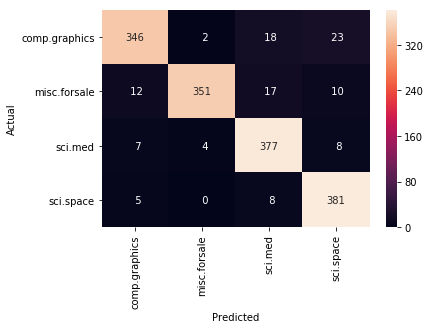

In [ ]:
from sklearn.datasets import fetch_20newsgroups
# Feature engineering - extract text documents to a example-feature table
twenty_train = fetch_20newsgroups(subset='train')
print("The groups:")
print(textwrap.fill(str(twenty_train.target_names)))
print("\n".join(twenty_train.data[0].splitlines()[:10]))
# Building a learning model from training data
ct_vect = sk_txt.CountVectorizer()
tfidf_xform = sk_txt.TfidfTransformer()
docs_as_counts = ct_vect.fit_transform(twenty_train.data)
docs_as_tfidf = tfidf_xform.fit_transform(docs_as_counts)
model = naive_bayes.MultinomialNB().fit(docs_as_tfidf, twenty_train.target)
doc_pipeline = pipeline.make_pipeline(sk_txt.CountVectorizer(),sk_txt.TfidfTransformer(),naive_bayes.MultinomialNB())
categories = ['misc.forsale','comp.graphics','sci.med','sci.space']
twenty_train = fetch_20newsgroups(subset='train',categories=categories, random_state=42)
doc_pipeline = pipeline.make_pipeline(sk_txt.TfidfVectorizer(),naive_bayes.MultinomialNB())
model = doc_pipeline.fit(twenty_train.data, twenty_train.target)
twenty_test = fetch_20newsgroups(subset='test',categories=categories,shuffle=True,random_state=42)
# Evaluating model on separate testing data
doc_preds = model.predict(twenty_test.data)
cm = metrics.confusion_matrix(twenty_test.target,doc_preds)
ax = sns.heatmap(cm,annot=True,xticklabels=twenty_test.target_names,yticklabels=twenty_test.target_names,fmt='3d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### Clustering
k-Means Clustering

TypeError: 'AxesSubplot' object does not support indexing

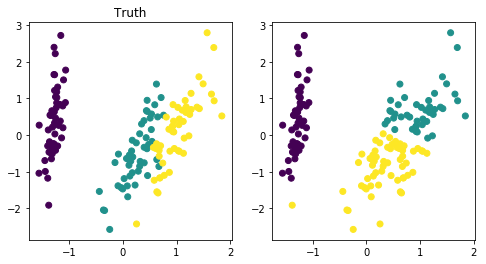

In [ ]:
iris = datasets.load_iris()
twod_iris = (decomposition.PCA(n_components=2, whiten=True).fit_transform(iris.data))
clusters = cluster.KMeans(n_clusters=3).fit(twod_iris)
fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].scatter(*twod_iris.T,c=iris.target)
axes[1].scatter(*twod_iris.T,c=clusters.labels_)
axes[0].set_title("Truth").axes[1].set_title("Clustered")